In [1]:
import sys
sys.path.append("../src")
from time_series import Collection, find_ders, find_files
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
fontsize = 10
fontstyle = {
    "pdf.fonttype": 42, # type 3 pdf fonts
    "mathtext.default": 'regular', # italic math
    'mathtext.fontset': 'cm',
    'font.family' : 'STIXGeneral',
    "text.usetex": True, # latex-based math
    # sans-serif Helvetica font
    #"text.latex.preamble":
    #    r'\usepackage{helvet} \usepackage{sansmath} \sansmath',
    #"font.family": "sans-serif",
    # font sizes
    "axes.labelsize": fontsize,
    'axes.titlesize': fontsize,
    "font.size": fontsize,
    "legend.fontsize": fontsize,
    "xtick.labelsize": fontsize,
    'xtick.direction': "inout",
    'xtick.top': True,
    'xtick.major.size': 4,
    'xtick.major.width': 0.5,
    'xtick.minor.width': 0.5,
    "ytick.labelsize": fontsize,
    'ytick.direction': "inout",
    'ytick.right': True,
    'ytick.major.size': 4,
    'ytick.major.width': 0.5,
    'ytick.minor.width': 0.5,
    "axes.linewidth": 0.5,
}

plt.rcParams.update(fontstyle)
letters_lower = [r"$\mathrm{\bf{%s}}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz"]
letters_round = [r"$\mathrm{\bf{(%s)}}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz"] 
letters_upper = [r"$\bf{%s}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz".upper()] 
letters_map = {"round": letters_round, "upper": letters_upper, "lower":letters_lower}  
def lettering(ax, x, y, num, color="k", mode="round", **kwargs):     
    letters = letters_map[mode]     
    ax.text(x, y, letters[num], weight="bold", transform=ax.transAxes,             
            horizontalalignment="center", verticalalignment="center", color=color, **kwargs)

In [2]:
#fname = "/home/lhillber/scratch/noise_trial_0.tdms" # Mount point
dark_der ="/data/brownian/20221019/nobead/dark"
bright_der ="/data/brownian/20221019/nobead/bright"
sorted(find_files(dark_der))

['/data/brownian/20221019/nobead/dark/iter_0.tdms',
 '/data/brownian/20221019/nobead/dark/iter_1.tdms',
 '/data/brownian/20221019/nobead/dark/iter_2.tdms',
 '/data/brownian/20221019/nobead/dark/iter_3.tdms',
 '/data/brownian/20221019/nobead/dark/iter_4.tdms',
 '/data/brownian/20221019/nobead/dark/iter_5.tdms',
 '/data/brownian/20221019/nobead/dark/iter_6.tdms',
 '/data/brownian/20221019/nobead/dark/iter_7.tdms',
 '/data/brownian/20221019/nobead/dark/iter_8.tdms',
 '/data/brownian/20221019/nobead/dark/iter_9.tdms']

In [3]:
psd_dark_avg = 0
Navg_dark = 0
fnames_dark = sorted(find_files(dark_der))
for fname in fnames_dark:
    print(fname)
    X = Collection(fname)
    X.set_collection("X")
    freq, psd = X.average("PSD")
    psd_dark_avg += psd / len(fnames_dark)
    Navg_dark += X.Navg_psd

psd_bright_avg = 0
Navg_bright = 0
fnames_bright = sorted(find_files(bright_der))
for fname in fnames_bright:
    print(fname)
    X = Collection(fname)
    X.set_collection("X")
    freq, psd = X.average("PSD")
    psd_bright_avg += psd / len(fnames_bright)
    Navg_bright += X.Navg_psd

/data/brownian/20221019/nobead/dark/iter_0.tdms
/data/brownian/20221019/nobead/dark/iter_1.tdms
/data/brownian/20221019/nobead/dark/iter_2.tdms
/data/brownian/20221019/nobead/dark/iter_3.tdms
/data/brownian/20221019/nobead/dark/iter_4.tdms
/data/brownian/20221019/nobead/dark/iter_5.tdms
/data/brownian/20221019/nobead/dark/iter_6.tdms
/data/brownian/20221019/nobead/dark/iter_7.tdms
/data/brownian/20221019/nobead/dark/iter_8.tdms
/data/brownian/20221019/nobead/dark/iter_9.tdms
/data/brownian/20221019/nobead/bright/iter_0.tdms
/data/brownian/20221019/nobead/bright/iter_1.tdms
/data/brownian/20221019/nobead/bright/iter_2.tdms
/data/brownian/20221019/nobead/bright/iter_3.tdms
/data/brownian/20221019/nobead/bright/iter_4.tdms
/data/brownian/20221019/nobead/bright/iter_5.tdms
/data/brownian/20221019/nobead/bright/iter_6.tdms
/data/brownian/20221019/nobead/bright/iter_7.tdms
/data/brownian/20221019/nobead/bright/iter_8.tdms
/data/brownian/20221019/nobead/bright/iter_9.tdms


In [4]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq, curve_fit

def lorentzian(x, A, x0, G):
    return A * G*G / ((x - x0)**2 + G*G)

def lorentzian4(x, A1,x1,G1, A2,x2,G2, A3,x3,G3, A4,x4,G4):
    return sum(lorentzian(x, A, x0, G) for A, x0, G in 
               zip([A1, A2, A3, A4], [x1, x2, x3, x4], [G1, G2, G3, G4]))

def gauss(x, A, x0, G):
    return A * np.exp((x-x0)**2/(2*G*G))

def gauss4(x, A1,x1,G1, A2,x2,G2, A3,x3,G3, A4,x4,G4):
    return sum(gauss(x, A, x0, G) for A, x0, G in 
               zip([A1, A2, A3, A4], [x1, x2, x3, x4], [G1, G2, G3, G4]))


2.371788224832099e-13 1.6665139226923094e-13


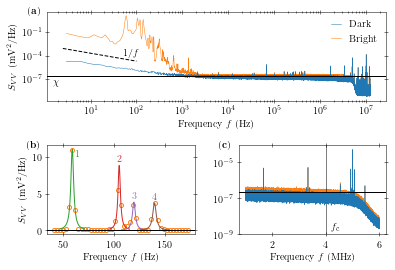

In [5]:
cb, cd = "C1", "C0"

fig = plt.figure(figsize=(5.5, 3.6))
gs = fig.add_gridspec(2, 2, figure=fig, top=0.98, bottom=0.12, hspace=0.5, wspace=0.3, right=0.98)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
axs = [ax0, ax1, ax2]

mask1 = np.logical_and(freq>40, freq<175)
mask2 = np.logical_and(freq>1e6, freq<6e6)
mean_mask = np.logical_and(freq>500e3, freq<1.5e6)
chi_bright = psd_bright_avg[mean_mask].mean()
chi_dark = psd_dark_avg[mean_mask].mean()
print(chi_bright, chi_dark)

ax0.loglog(freq[1:], psd_dark_avg[1:]*1e6, lw=0.5, zorder=10, label="Dark", c=cd)
ax0.loglog(freq[1:], psd_bright_avg[1:]*1e6, lw=0.5, label="Bright", c=cb)
fnoise = np.geomspace(2.5, 1e2, 200)
ax0.plot(fnoise, 1/fnoise/5e8*1e6, c="k", lw=1, ls="--")

ax1.plot(freq[mask1], psd_bright_avg[mask1]*1e6, lw=1, marker="o", ms=4, ls="none", mfc="none", mec=cb, zorder=0)
#ax1.plot(freq[mask1], psd_dark_avg[mask1]*1e6, lw=1, marker=".", c=cd)
x, y = freq[mask1], psd_bright_avg[mask1]
popt, pcov = curve_fit(lorentzian4, x, y, p0=[1e-5,60,10,  0.6e-5,105,10, 0.5e-5,120,10, 0.5e-5,140,10])
popts = popt.reshape(4,3)
perrs =  np.sqrt(np.diag(pcov)).reshape(4,3)
for pi, p in enumerate(popts):
    xs = np.linspace(p[1]-7*p[2], p[1]+7*p[2], 100)
    ax1.plot(xs, lorentzian(xs, *p)*1e6, c=f"C{pi+2}", lw=1)
    if pi ==0:
        ax1.text(p[1]+3, p[0]*1e6-1, pi+1, color=f"C{pi+2}")
    else:
         ax1.text(p[1]-2, p[0]*1e6+0.5, pi+1, color=f"C{pi+2}")

ax2.plot(freq[mask2]/1e6, psd_dark_avg[mask2]*1e6, lw=0.5, zorder=10, c=cd)
ax2.plot(freq[mask2]/1e6, psd_bright_avg[mask2]*1e6, lw=0.5, c=cb)
ax2.axvline(4, lw=0.5, c="k")

for ax in axs:
    ax.axhline(chi_bright*1e6, c="k", lw=1, zorder=11)


"""
patch, pp1, pp2 = mark_inset(ax0, ax1, loc1=1, loc2=2, fc="none", ec='0.5')
pp1.loc1=1
pp2.loc1=2
pp1.loc2=4
pp2.loc2=3

patch, pp1, pp2 = mark_inset(ax0, ax2, loc1=1, loc2=2, fc="none", ec='0.5')
pp1.loc1=1
pp2.loc1=2
pp1.loc2=4
pp2.loc2=3
"""

ax2.set_yscale("log")
#ax1.set_yscale("log")
    



ax0.set_xlabel("Frequency $f$ (Hz)") 
ax1.set_xlabel("Frequency $f$ (Hz)") 
ax2.set_xlabel("Frequency $f$ (MHz)") 

ax0.set_ylabel(r"$S_{VV}~{\rm (mV^2/Hz)}$")
ax1.set_ylabel(r"$S_{VV}~{\rm (mV^2/Hz)}$")
ax2.set_yticks([1e-5, 1e-7, 1e-9])

ax0.text(50, 0.8e-10*1e6, r"$1/f$")
ax0.text(1.5, 2e-14*1e6, r"$\chi$")
ax2.text(4.2, 2e-15*1e6, r"$f_{\rm c}$")

lettering(ax0, -0.04, 1, 0)
lettering(ax1, -0.1, 1, 1)
lettering(ax2, -0.1, 1, 2)
ax0.legend(frameon=False, loc="upper right", handlelength=1)

plt.savefig("figures/dissertation/noise_psd.pdf", dpi=600)

(1.1289300545331632e-10, 5.039999999999999e-06)

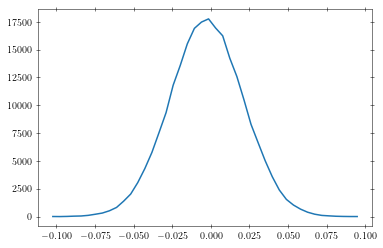

In [74]:
X = Collection(fnames_bright[0])
X.set_collection("X")
X.apply("calibrate", cal=1/1.7e6, inplace=True)
X.apply("bin_average", Npts=128, inplace=True)
X.apply("differentiate", inplace=True)
bins, hist = X.average("HIST")
plt.plot(bins*1e3, hist)
np.mean([np.std(D.x) for D in X.collection]) * (X.t[1] - X.t[0]), (X.t[1] - X.t[0])

(1.1289300545331632e-10, 5.039999999999999e-06)

In [21]:
psd_dark_avg = 0
Navg_dark = 0
fnames_dark = sorted(find_files(dark_der))
for fname in fnames_dark:
    print(fname)
    Y = Collection(fname)
    Y.set_collection("Y")
    Y.apply("correct", response=mic_response, n_jobs=1, 
            window="boxcar", differentiate=False, recollect=True)
    freq, psd = Y.average("PSD")
    psd_dark_avg += psd / len(fnames_dark)
    Navg_dark += Y.Navg_psd


/data/brownian/20221019/nobead/dark/iter_0.tdms
/data/brownian/20221019/nobead/dark/iter_1.tdms
/data/brownian/20221019/nobead/dark/iter_2.tdms
/data/brownian/20221019/nobead/dark/iter_3.tdms
/data/brownian/20221019/nobead/dark/iter_4.tdms
/data/brownian/20221019/nobead/dark/iter_5.tdms
/data/brownian/20221019/nobead/dark/iter_6.tdms
/data/brownian/20221019/nobead/dark/iter_7.tdms
/data/brownian/20221019/nobead/dark/iter_8.tdms
/data/brownian/20221019/nobead/dark/iter_9.tdms


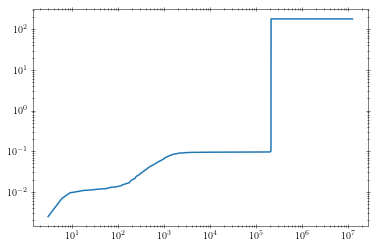

In [28]:
from scipy.integrate import cumtrapz
plt.loglog(freq[1:], cumtrapz(psd_dark_avg, freq))

In [20]:
from acoustic_entrainment import mic_response


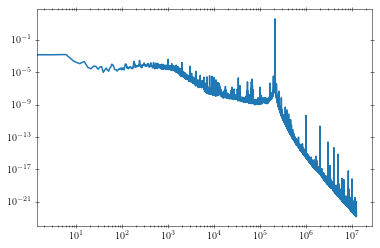

In [29]:
plt.loglog(freq, psd_dark_avg)

In [33]:
Y.

{'tdms_file': <TdmsGroup with path /'main'>,
 't0': array([0.        , 0.40001636, 0.80000948]),
 'colletion_name': 'Collection channel is not set!',
 'collection': [<time_series.TimeSeries at 0x7fc02c9a0970>,
 'collection_name': 'Y',
 'psd': array([1.60228881e-04, 1.29898013e-03, 1.37426055e-03, ...,
        8.40261548e-23, 1.66170146e-22, 1.24079645e-21]),
 'freq': array([0.00000000e+00, 2.98023259e+00, 5.96046519e+00, ...,
        1.24999925e+07, 1.24999955e+07, 1.24999985e+07]),
 'Navg_psd': 3}